# ACCESS-NRI 2025 -- CMWG Workshop 
# Example Cryosphere Datapool

This notebook loads an example of the **Cryosphere Datapool**. Note that we use the terminology "ESM-datastore" throughout to be consistent with similar datastores/datapools used by ACCESS-NRI. Essentially, the "Cryosphere datapool" is one "ESM-datastore" at this point. The ESM-datastore currently contains 3 example datasets, but will be populated with additional relevant datasets as development continues.

Interacting with the ESM-Datastore leverages functionality from the [access-nri-intake-catalog](https://github.com/ACCESS-NRI/access-nri-intake-catalog).

<div class="alert alert-block alert-info">
<b>AIM:</b> This notebook provides an example of how the <b>Cryosphere Datapool</b> may be used to discover datasets relevant to ice sheet modelling.
</div>

In [1]:
## Load required modules
import intake
import matplotlib.pyplot as plt

## 1 - Load the Cryosphere ESM datastore

The Cryosphere ESM-datastore consists of a `*.json` file that essentially "maps" to various datasets across gadi. Currently, example datasets are simply stored in `/g/data/nf33/access-nri/cryo_data/`

In [2]:
## Open the ESM-datastore

datastore = intake.open_esm_datastore(
    '/g/data/nf33/access-nri/cryo_datapool/cryo_input_datastore.json',
    columns_with_iterables = ['variable'])

### 1.1 - View the ESM-datastore as a dataframe

To view the datasets included in the ESM-datastore, we can load it as a pandas dataframe.


In [3]:
## View the ESM_datastore as a dataframe
datastore.df

,filename,path,file_id,frequency,start_date,end_date,variable,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,realm
0,BedMachineAntarctica-v3.nc,/g/data/nf33/access-nri/cryo_data/BedMachine_v...,cryo.fx.BedMachineAntarctica-v3,fx,none,none,['bed' 'dataid' 'errbed' 'firn' 'geoid' 'mask'...,"['bed topography', 'data id', 'bed topography/...","['bedrock_altitude', '', '', '', 'geoid_height...","['', '', '', '', '', '', '', '', '', '', '']","['meters', '', 'meters', 'meters', 'meters', '...",cryo
1,bedmap3.nc,/g/data/nf33/access-nri/cryo_data/BedMap3/bedm...,cryo.fx.bedmap3,fx,none,none,['bed_topography' 'bed_uncertainty' 'ice_thick...,"['Bedrock Elevation', 'Uncertainty in bed elev...","['bedrock_altitude', '', 'land_ice_thickness',...","['', '', '', '', '', '', '', '', '']","['meters', 'meters', 'meters', '1', 'meters', ...",cryo
2,antarctica_ice_velocity_450m_v2.nc,/g/data/nf33/access-nri/cryo_data/MEaSUREs_vel...,cryo.fx.antarctica_ice_velocity_450m_v2,fx,none,none,['CNT' 'ERRX' 'ERRY' 'STDX' 'STDY' 'VX' 'VY' '...,"['Cnt velocity', 'Err velocity in x direction'...","['cnt_ice_velocity', 'err_ice_x_velocity', 'er...","['', '', '', '', '', '', '', '', '', '', '']","['Count', 'meter/year', 'meter/year', 'meter/y...",cryo


## 2 - Search the ESM-datastore

There are multiple ways to search a ESM-datastore. Below, we demonstrate 2 different ways:

1. Using regular expressions -- We can search the ESM-datastore using regular expressions on any column field that is **NOT** included as an iterable when loading the datastore.

2. Interactively -- We can use an interactive widget to search the ESM-datastore.

### 2.1 - Regex searching

Let's search the ESM-datastore to return all datasets that contain a variable that relates to the bed / bed topography of Antarctica.

In [4]:
## Filter the ESM-datastore to show only datasets that have some form of 'bed' variable
bed_datasets = datastore.search(variable_standard_name = ".*bed.*")

## Show how many datasets were returned
bed_datasets

,unique
filename,2
path,2
file_id,2
frequency,1
start_date,1
end_date,1
variable,17
variable_long_name,2
variable_standard_name,2
variable_cell_methods,2


We can see that this search returns 2 datasets that have relevant data/variables. We can better interrogate these selected datasets by again loading the (filtered) ESM-datastore as a dataframe.

In [5]:
## View the filtered ESM-datastore as a dataframe
bed_datasets.df

,filename,path,file_id,frequency,start_date,end_date,variable,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,realm
0,BedMachineAntarctica-v3.nc,/g/data/nf33/access-nri/cryo_data/BedMachine_v...,cryo.fx.BedMachineAntarctica-v3,fx,none,none,['bed' 'dataid' 'errbed' 'firn' 'geoid' 'mask'...,"['bed topography', 'data id', 'bed topography/...","['bedrock_altitude', '', '', '', 'geoid_height...","['', '', '', '', '', '', '', '', '', '', '']","['meters', '', 'meters', 'meters', 'meters', '...",cryo
1,bedmap3.nc,/g/data/nf33/access-nri/cryo_data/BedMap3/bedm...,cryo.fx.bedmap3,fx,none,none,['bed_topography' 'bed_uncertainty' 'ice_thick...,"['Bedrock Elevation', 'Uncertainty in bed elev...","['bedrock_altitude', '', 'land_ice_thickness',...","['', '', '', '', '', '', '', '', '']","['meters', 'meters', 'meters', '1', 'meters', ...",cryo


### 2.2 - Interactive searching

We can also search the ESM-datastore using a handy interactive widget but simply running `datastore.interactive`.

In [6]:
## Initialise the interactive widget
datastore.interactive

Loading ITables v2.4.4 from the internet... (need help?)


## 3 - Load a dataset

Once we've identified a dataset that we'd like to access, we can simply load it directly from the datastore. The easiest way to do this is to use the `file_id` field. If we only want a specific variable (e.g. bed) we can specify this to isolate the variables. Let's load the bed topography from BedMachine v3.

In [7]:
## Load the BedMachine v3 bed topography
bed = datastore.search(file_id = "cryo.fx.BedMachineAntarctica-v3", variable = "bed").to_dask()

## View the dataset
bed

/home/565/lb9857/.local/lib/python3.11/site-packages/intake_esm/core.py:301: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  records = grouped.get_group(internal_key).to_dict(orient='records')


<xarray.Dataset> Size: 711MB
Dimensions:  (y: 13333, x: 13333)
Coordinates:
    mapping  |S1 1B ...
  * x        (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y        (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Data variables:
    bed      (y, x) float32 711MB dask.array<chunksize=(1905, 1905), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                              CF-1.7
    Title:                                    BedMachine Antarctica
    Author:                                   Mathieu Morlighem
    version:                                  03-Jun-2022 (v3.4)
    nx:                                       13333.0
    ny:                                       13333.0
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ['bedrock_altitude', '', '', ''...
    intake_esm_attrs:variable_cell_methods:   ['', '', '', '', '', '', '', ''...
    intake_esm_attrs:variable_units:          ['meters', '', 'meters', 'meter...
    intake_esm_attrs:realm:                   cryo
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   cryo.fx.BedMachineAntarctica-v3

Now that we've loaded the bed topography dataset, we can interact with it just like any other `xarray` dataset! Let's coarsen it to reduce the number of points to make plotting a little faster here.

In [8]:
## Now we can interact with dataset as normal. Let's coarsen it to improve rendering times
bed_5km = bed.coarsen(x = 10, y = 10, boundary = 'trim').mean()

## Viewing the dataset shows that X/Y dimensions are now 1333 x 1333 (compared to 13333 x 13333 above)
bed_5km

<xarray.Dataset> Size: 7MB
Dimensions:  (y: 1333, x: 1333)
Coordinates:
    mapping  |S1 1B b''
  * x        (x) float64 11kB -3.331e+06 -3.326e+06 ... 3.324e+06 3.329e+06
  * y        (y) float64 11kB 3.331e+06 3.326e+06 ... -3.324e+06 -3.329e+06
Data variables:
    bed      (y, x) float32 7MB dask.array<chunksize=(190, 190), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                              CF-1.7
    Title:                                    BedMachine Antarctica
    Author:                                   Mathieu Morlighem
    version:                                  03-Jun-2022 (v3.4)
    nx:                                       13333.0
    ny:                                       13333.0
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ['bedrock_altitude', '', '', ''...
    intake_esm_attrs:variable_cell_methods:   ['', '', '', '', '', '', '', ''...
    intake_esm_attrs:variable_units:          ['meters', '', 'meters', 'meter...
    intake_esm_attrs:realm:                   cryo
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   cryo.fx.BedMachineAntarctica-v3

We can plot the dataset just like any other `xarray` dataset!

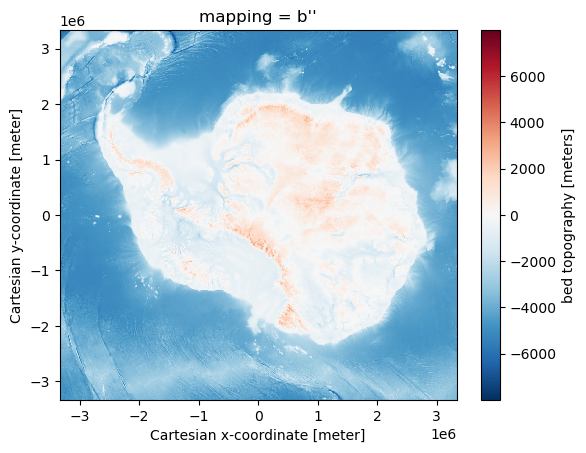

In [9]:
## Create a default xarray plot of the dataset
bed_5km.bed.plot()

## 4. Load multiple datasets

If there are multiple datasets that we'd like to access, we can load them simultaneously into a dictionary. Let's load both BedMachine v3 and Bedmap3 so we can compare different bed topography datasets.

In [10]:
## Let's identify all datasets that have "bed" variables in them and load them all into a dictionary using .to_dataset_dict()
bed_datasets = datastore.search(variable_standard_name = '.*bed.*').to_dataset_dict()

## Viewing the dictionary shows 2 datasets
bed_datasets


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_id'


/home/565/lb9857/.local/lib/python3.11/site-packages/intake_esm/core.py:301: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  records = grouped.get_group(internal_key).to_dict(orient='records')
/home/565/lb9857/.local/lib/python3.11/site-packages/intake_esm/core.py:301: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  records = grouped.get_group(internal_key).to_dict(orient='records')


{'cryo.fx.bedmap3': <xarray.Dataset> Size: 5GB
 Dimensions:                 (x: 13334, y: 13334)
 Coordinates:
   * x                       (x) float32 53kB -3.333e+06 -3.333e+06 ... 3.333e+06
   * y                       (y) float32 53kB 3.333e+06 3.333e+06 ... -3.333e+06
 Data variables:
     surface_topography      (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     bed_uncertainty         (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     bed_topography          (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     mask                    (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     ice_thickness           (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     thickness_survey_count  (y, x) float32 711MB dask.array<chunksize=(13334, 13334), meta=np.ndarray>
     thickness_uncertainty   (y, x) float32 711MB dask.array<chunksize=(13334, 13334)

The datasets contained inside the dictionary can be accessed using the unique `file_id` for each dataset. The dictionary keys() show the unique `file_id` field for each dataset. Let's take a look.

In [11]:
bed_datasets.keys()

dict_keys(['cryo.fx.bedmap3', 'cryo.fx.BedMachineAntarctica-v3'])

Now, let's coarsen both BedMachine v3 and BedMap3 and plot them side-by-side. Remember, we haven't had to download/upload either of these datasets and we've accessed then both directly from the ESM-datastore.

In [12]:
## Coarsen both datasets to reduce rendering times

bedmap = bed_datasets['cryo.fx.bedmap3'].coarsen(x = 10, y = 10, boundary = 'trim').mean()
bedmachine = bed_datasets['cryo.fx.BedMachineAntarctica-v3'].coarsen(x = 10, y = 10, boundary = 'trim').mean()

Text(0.5, 1.0, 'BedMachine v3')

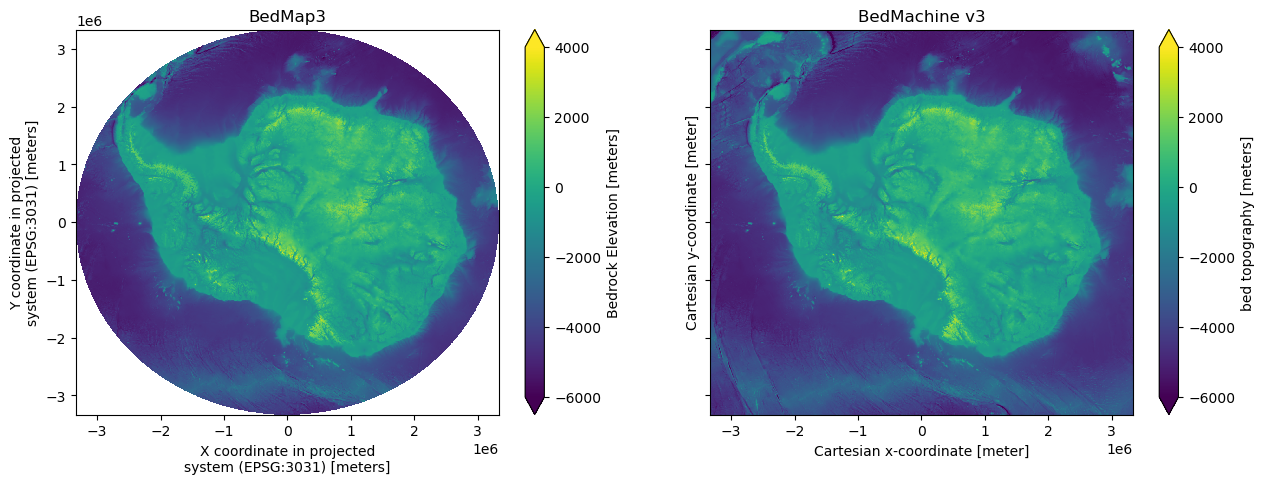

In [13]:
## Plot BedMachine v3 and BedMap3.
## NOTE: We truncate the extent of the colorbar so they plot with the same colour scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)
bedmap.bed_topography.plot(ax = ax1, vmax = 4000, vmin = -6000)
bedmachine.bed.plot(ax = ax2, vmax = 4000, vmin = -6000)

ax1.set_title('BedMap3')
ax2.set_title('BedMachine v3')

BedMachine v3 and BedMap3 are defined on slightly different X/Y coordinates. To allow us to directly compare them, we need to align the coordinates. A quick-and-easy way to do this is to use the `interp_like()` function in `xarray`. Here, we interpolate the BedMap3 data onto the BedMachine v3 coordinates and calculate the difference between the 2 datasets. We then plot the difference between the two datasets.

In [14]:
## Align the X/Y coordinates
bedmap_interp = bedmap.bed_topography.interp_like(bedmachine.bed)

## Calculate the difference
diff = bedmachine.bed - bedmap_interp

Text(0.5, 1.0, 'Bed elevation difference between BedMachine v3 and Bedmap3\n (Bedmachine v3 - Bedmap3)')

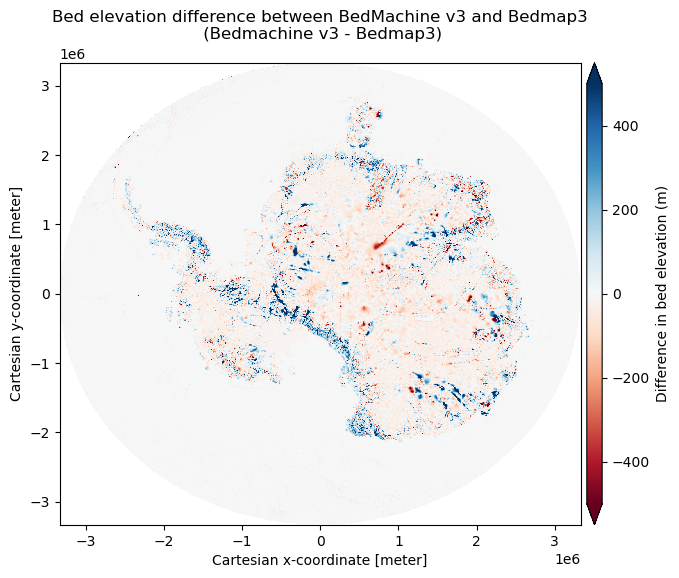

In [15]:
## Plot the difference between BedMachine v3 and BedMap3

fig, ax = plt.subplots(figsize = (8, 6))
diff.plot(ax = ax,
          vmin = -500, 
          vmax = 500,
          cmap = 'RdBu',
          cbar_kwargs = {'label': 'Difference in bed elevation (m)',
                        'aspect': 30,
                        'pad': 0.01})
plt.title('Bed elevation difference between BedMachine v3 and Bedmap3\n (Bedmachine v3 - Bedmap3)')